In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('dataset_mood_smartphone.csv')
data

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


Data:
- how many records are there
- how many attributes
- what kinds of attributes are there
- ranges of values
- distribution of values,
- relationships between attributes
- missing values

In [3]:
print(f"nr. of records: {len(data)}")
print(f"nr. of attributes: {len(data['variable'].unique())}")
print(f"the attributes are: {data['variable'].unique()}")
print(f"The ranges of values for each attribute are: ")
print(data.groupby('variable')['value'].describe()[['min', 'max']])


nr. of records: 376912
nr. of attributes: 19
the attributes are: ['mood' 'circumplex.arousal' 'circumplex.valence' 'activity' 'screen'
 'call' 'sms' 'appCat.builtin' 'appCat.communication'
 'appCat.entertainment' 'appCat.finance' 'appCat.game' 'appCat.office'
 'appCat.other' 'appCat.social' 'appCat.travel' 'appCat.unknown'
 'appCat.utilities' 'appCat.weather']
The ranges of values for each attribute are: 
                            min        max
variable                                  
activity                  0.000      1.000
appCat.builtin       -82798.871  33960.246
appCat.communication      0.006   9830.777
appCat.entertainment     -0.011  32148.677
appCat.finance            0.131    355.513
appCat.game               1.003   5491.793
appCat.office             0.003  32708.818
appCat.other              0.014   3892.038
appCat.social             0.094  30000.906
appCat.travel             0.080  10452.615
appCat.unknown            0.111   2239.937
appCat.utilities          0.246 

Range of values: 
- mood: 1 to 10
- arousal/valence: -2 to 2
- activity: 0 to 1
- call/sms: call or sms made is indicated by 1
- screen/builtin/communication/entertainment/finance/game/office/other/social/travel/unknown/utilities/weather: time

Note: are the app variables all disjoint?

notice how the variables call and sms only have the value 1; are these then redundant. Moreover, variables builttin and entertainment have negative values, which is impossible since it tracks time. These have to be resolved.

activity


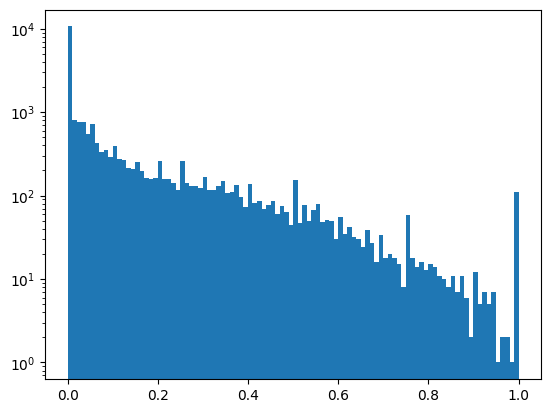

appCat.builtin


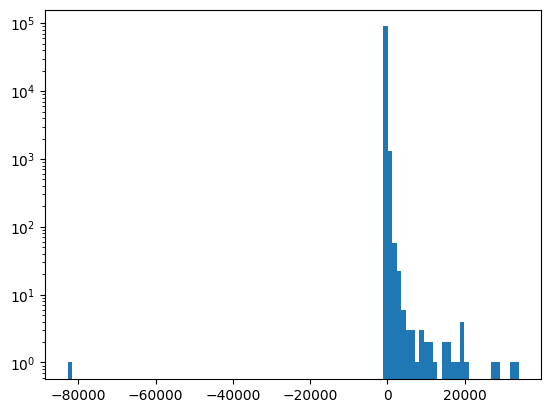

appCat.communication


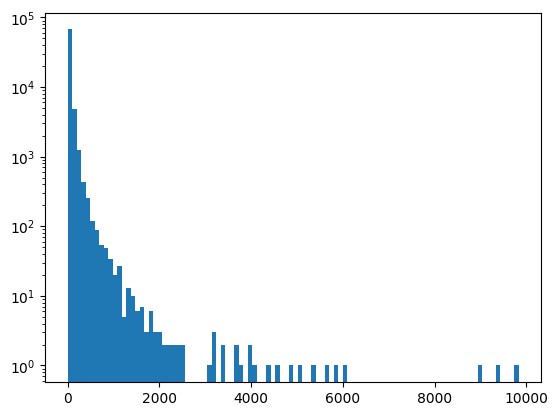

appCat.entertainment


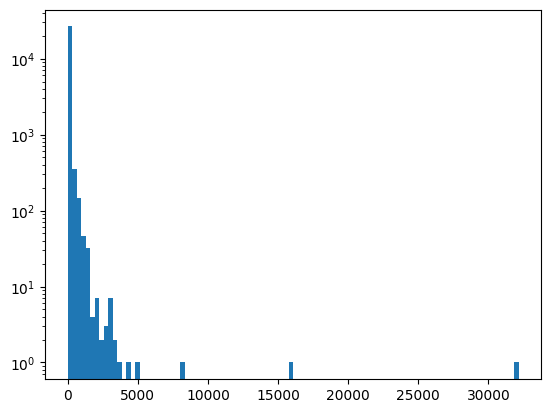

appCat.finance


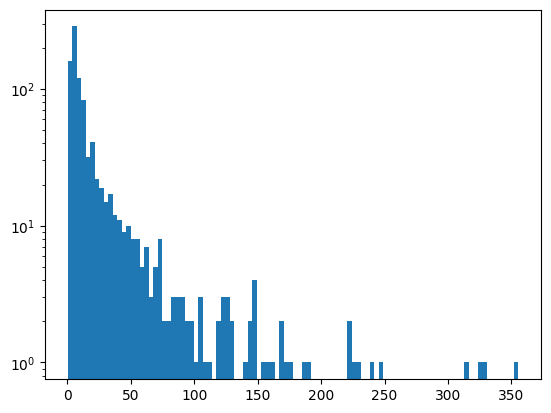

appCat.game


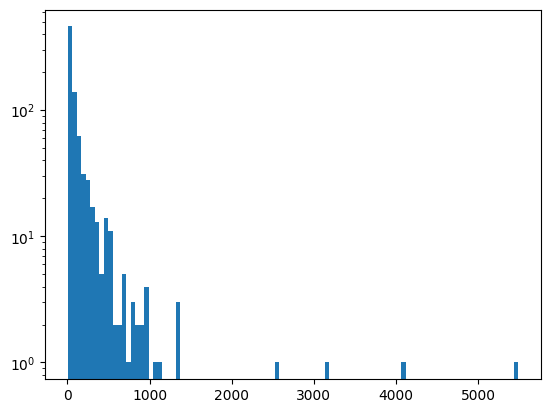

appCat.office


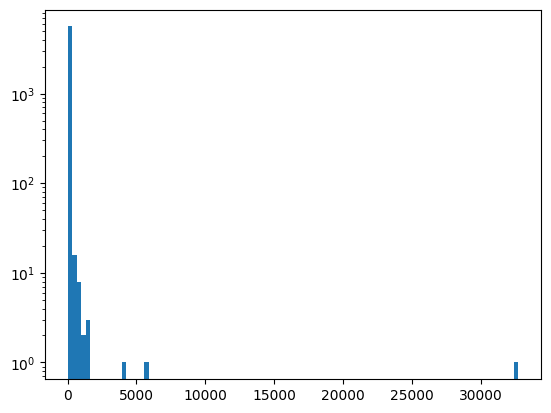

appCat.other


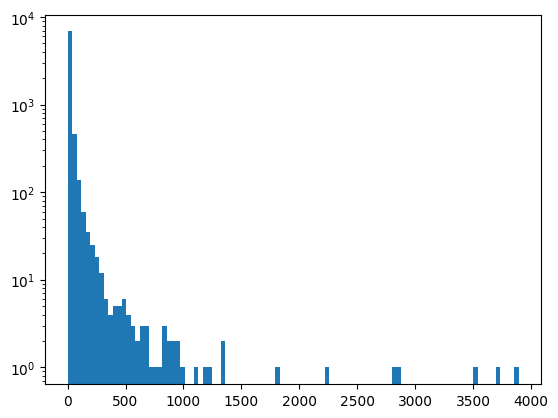

appCat.social


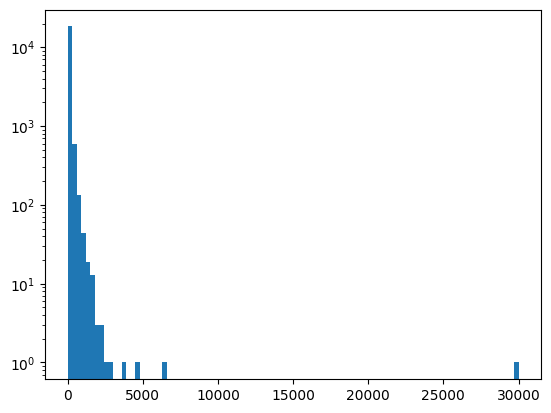

appCat.travel


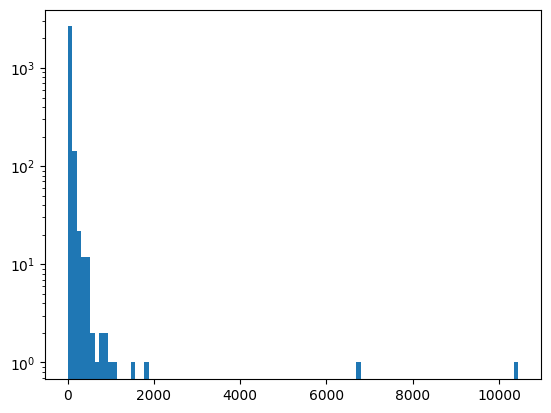

appCat.unknown


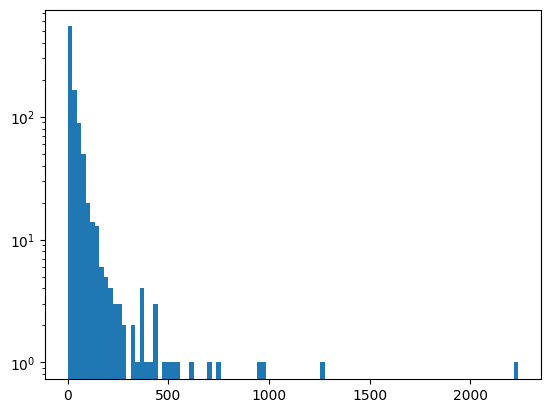

appCat.utilities


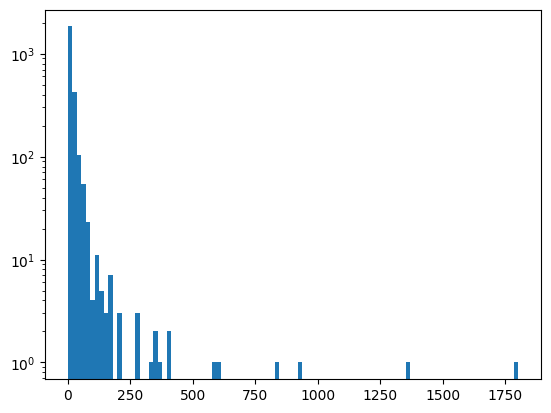

appCat.weather


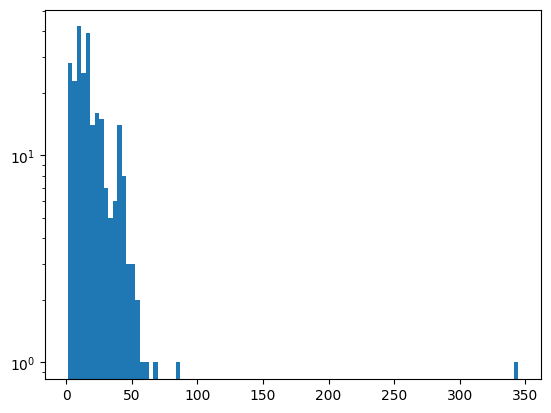

call


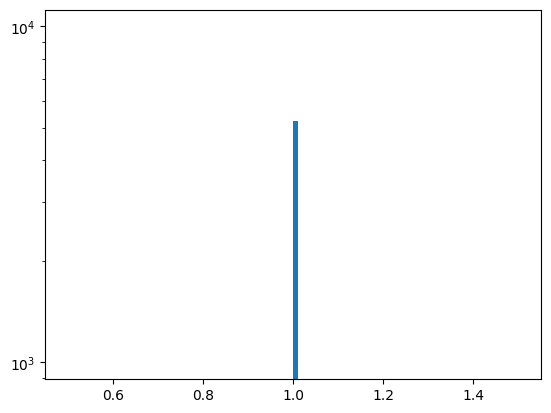

circumplex.arousal


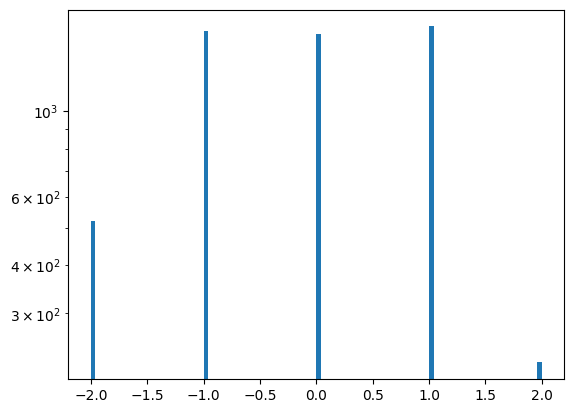

circumplex.valence


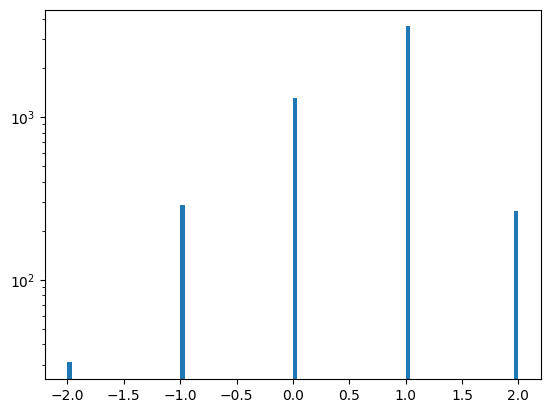

mood


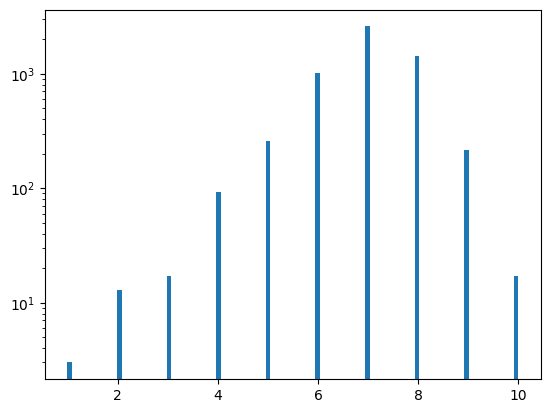

screen


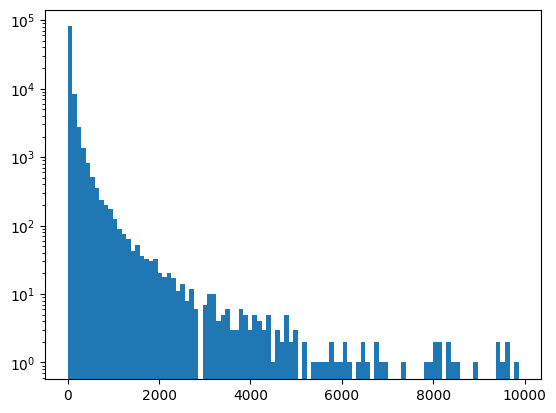

sms


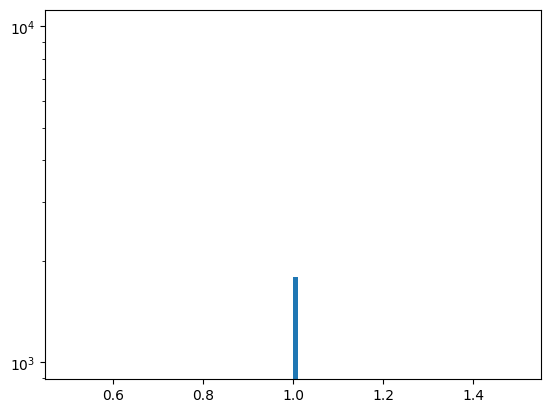

In [19]:
# DISTRIBUTIONS OF EACH VARIABLE

grouped = data.groupby('variable')['value']
for n, g in grouped:
    print(n)
    plt.hist(g, density=False, bins=100, log=True)
    plt.show()

In [18]:
# NOTE THAT VALUE IS IN SECONDS: 60 = 1 MIN;  3600 = 1 HOUR; 10000 = 2.8 HOURS
for var in ['appCat.builtin', 'appCat.entertainment', 'appCat.office', 'appCat.social']:
    d = data.loc[(data['variable']==var) ] # & (data['id'] == 'AS14.09')
    print(var)
    print()
    print(d.nlargest(5, 'value'))



appCat.builtin

        Unnamed: 0       id                     time        variable  \
172955     1011941  AS14.14  2014-04-08 23:34:57.855  appCat.builtin   
204569      166419  AS14.27  2014-04-20 23:13:11.269  appCat.builtin   
165330      805231  AS14.12  2014-04-19 02:10:37.487  appCat.builtin   
163298      773471  AS14.12  2014-04-09 02:42:21.210  appCat.builtin   
196457      152701  AS14.26  2014-04-16 23:48:21.302  appCat.builtin   

            value  
172955  33960.246  
204569  31729.818  
165330  28163.993  
163298  27160.374  
196457  20556.690  
appCat.entertainment

        Unnamed: 0       id                     time              variable  \
324731      534116  AS14.09  2014-03-23 23:13:26.411  appCat.entertainment   
327574      538841  AS14.09  2014-04-08 18:22:51.526  appCat.entertainment   
311673      493248  AS14.03  2014-04-12 19:49:44.451  appCat.entertainment   
319612      511851  AS14.06  2014-04-11 09:29:00.302  appCat.entertainment   
334754      686823 

group by user